# Doodle Drawing Classification

The purpose of the project is to build a model which classify the hand-drawing doodle for 10 categories: 

* Helmet
* Sweater
* T-shirt
* Underwear
* Shorts
* Pants
* Rollerskates
* Shoe
* Purse
* Flip Flops

The common sense of all these categories is: Something you wear.

I used the data from webpage: https://quickdraw.withgoogle.com/data


# Data Understanding and Preprocessing

## Starting with the neccesary libraries' imports. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style='whitegrid', font_scale=1.5)
import urllib
import urllib.request
import os

from sklearn.model_selection import train_test_split
import tensorflow as tf


## Here is the list with my categories/classes names.


In [ ]:
class_names=['helmet', 'sweater','t-shirt', 'underwear', 'shorts', 'pants', 'rollerskates', 'shoe', 'purse', 'flip flops']

## Loading the data from the web page and saving as npy files


In [ ]:
for name in class_names:
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/%s.npy'%name
    file_name = url.split('/')[-1].split('?')[0]

    url = url.replace(' ','%20')
    
    if not os.path.isfile(file_name):
        print(url, '==>', file_name)
        urllib.request.urlretrieve(url, file_name)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/helmet.npy ==> helmet.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sweater.npy ==> sweater.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/t-shirt.npy ==> t-shirt.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/underwear.npy ==> underwear.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/shorts.npy ==> shorts.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pants.npy ==> pants.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/rollerskates.npy ==> rollerskates.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/shoe.npy ==> shoe.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/purse.npy ==> purse.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/flip%20flops.npy ==> flip flops.npy


## Creating my dataset with doodles


In [ ]:
data = []
for name in class_names:
    file_name = name+'.npy'
    data.append(np.load(file_name, fix_imports=True, allow_pickle=True))
    print('%-15s'%name,type(data[-1]))

helmet          <class 'numpy.ndarray'>
sweater         <class 'numpy.ndarray'>
t-shirt         <class 'numpy.ndarray'>
underwear       <class 'numpy.ndarray'>
shorts          <class 'numpy.ndarray'>
pants           <class 'numpy.ndarray'>
rollerskates    <class 'numpy.ndarray'>
shoe            <class 'numpy.ndarray'>
purse           <class 'numpy.ndarray'>
flip flops      <class 'numpy.ndarray'>


## Verifying the numbers and shape for my data per class


In [ ]:
for i in range(len(data)):
    print('%-15s'%class_names[i], len(data[i]), data[i][0].shape[0])

helmet          121899 784
sweater         120184 784
t-shirt         125233 784
underwear       124548 784
shorts          124970 784
pants           144264 784
rollerskates    119772 784
shoe            120231 784
purse           123320 784
flip flops      121518 784


[121899, 120184, 125233, 124548, 124970, 144264, 119772, 120231, 123320, 121518]


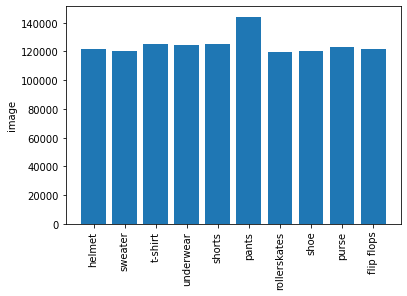

In [ ]:
numbers = []
for i in range(len(data)):
    numbers.append(len(data[i]))
    
print(numbers)

plt.bar(class_names, numbers)
plt.xticks(class_names, rotation='vertical')
plt.ylabel('image')
plt.show()


## Sample data visualization to better understand the data 
Need to reshape our data before viz


In [ ]:
data = [_.reshape(-1,28,28) for _ in data]

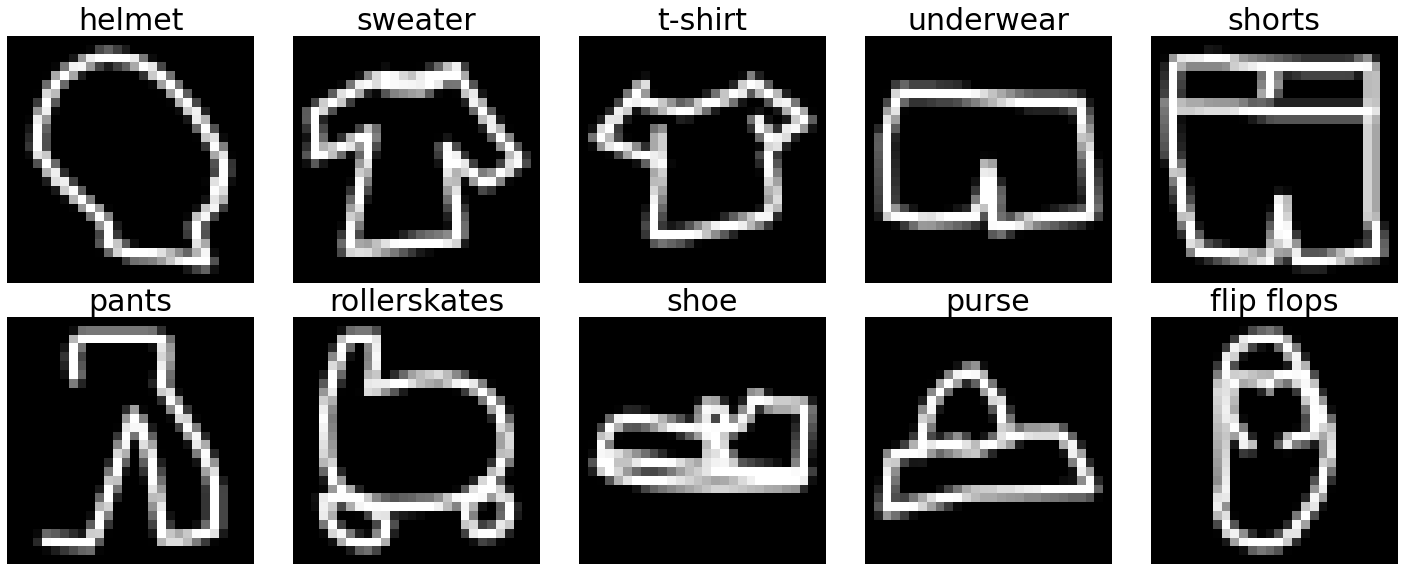

In [ ]:
plt.figure(figsize=(20,8))

for i in range(len(data)):
    plt.subplot(2,5,1+i)
    plt.imshow(data[i][1], cmap = 'gray')
    plt.title(class_names[i], fontsize=30)
    plt.axis('off')

plt.tight_layout()

# Preprocessing
- X - numpy matrix withh all doodles
- y - numpy matrix with all labels
- limited the images' numbers for training 


In [ ]:
X = np.concatenate([np.array(data[i][:70000]) for i in range(len(data))])
print(X.shape)

(700000, 28, 28)


In [ ]:
y = np.concatenate([[i]*data[i][:70000].shape[0] for i in range(len(data))])
print(y.shape)

(700000,)


In [ ]:
X = X.reshape(-1,28,28,1)

Data Normalization


In [ ]:
print("BEFORE -> X min:", np.min(X), "X max:", np.max(X))
X = X/255.0
print("AFTER -> X min:", np.min(X), "X max:", np.max(X))

BEFORE -> X min: 0 X max: 255
AFTER -> X min: 0.0 X max: 1.0


# Model training

## Train / validation data spliting



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify = y)
print([_.shape for _ in [X_train, X_val, y_train, y_val]])

[(560000, 28, 28, 1), (140000, 28, 28, 1), (560000,), (140000,)]


# Building and training models


In [ ]:
def getModel():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')], name = 'Basic')
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
model = getModel()
model.summary()

Model: "Basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 10)                154890    
                                                                 
Total params: 160,778
Trainable params: 160,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
params = {}
params ['getModel'] = model.count_params()

In [ ]:
epochs=30
batch_size=128
history_getModel = model.fit(X_train,
                             y_train,
                             epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
del model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Building additional model to improve results

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)

In [ ]:
def getModelAveragePooling():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.AveragePooling2D(),
        tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
        tf.keras.layers.AveragePooling2D(),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')], name='AveragePooling')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = getModelAveragePooling()
model.summary()

Model: "AveragePooling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 8)        0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten_1 (Flatten)         (None, 288)            

In [ ]:
params['getModelAveragePooling'] = model.count_params()

In [ ]:
epochs=30
batch_size=128
history_getModelAveragePooling = model.fit(X_train,
                             y_train,
                             epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0, callbacks = [callback])
del model

In [ ]:
def getModelDropout(ratios=[0.3,0.3]):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.Dropout(ratios[0]),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(ratios[1]),
                tf.keras.layers.Dense(10, activation='softmax')], name = "Dropout")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = getModelDropout()
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 dropout (Dropout)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 flatten_2 (Flatten)         (None, 15488)             0         
                                                                 
 dropout_1 (Dropout)         (None, 15488)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                1548

In [ ]:
params ['getModelDropout'] = model.count_params()

In [ ]:
epochs=30
batch_size=128
history_getModelDropout = model.fit(X_train,
                             y_train,
                             epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0,callbacks = [callback])
del model

In [ ]:
def getModelCNNBN():
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(10, activation='softmax')],name='BN')
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = getModelCNNBN()
model.summary()


Model: "BN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten_3 (Flatten)         (None, 15488)             0        

In [ ]:
params ['getModelCNNBN'] = model.count_params()

In [ ]:
epochs=30
batch_size=128
history_getModelCNNBN = model.fit(X_train,
                             y_train,
                             epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0, callbacks = [callback])
del model

In [ ]:
def vizualize_results(models, histories):
    plt.figure(figsize=(20,10))
    ax1=plt.subplot(121)
    
    srtd = sorted(zip(models, histories), key=lambda x: max(x[1].history['val_accuracy']))[::-1]
    for name, history in srtd:
        plt.plot(history.history['accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Training accuracy')
        plt.legend()
    plt.subplot(122, sharey=ax1)
    for name, history in srtd:
        plt.plot(history.history['val_accuracy'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Validation accuracy')
        plt.legend();

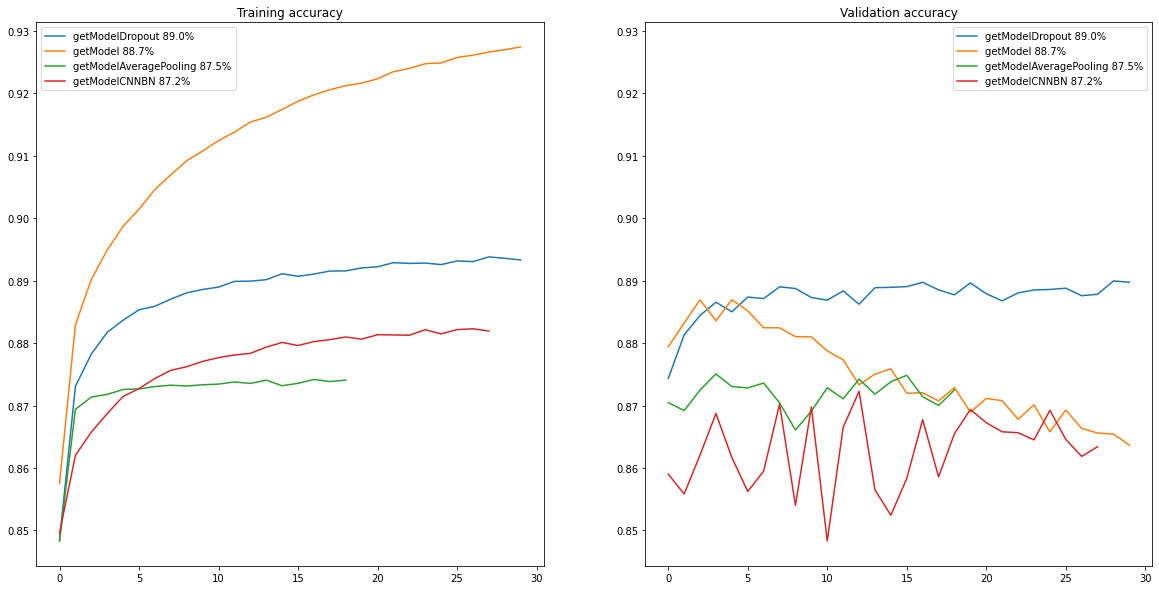

In [ ]:
model_names = ["getModel", "getModelAveragePooling", "getModelDropout", "getModelCNNBN"]
histories = [history_getModel, history_getModelAveragePooling, history_getModelDropout, history_getModelCNNBN]
vizualize_results(model_names, histories)

In [ ]:
def getModelComboAvgPool_Dropout(ratios=[0.3,0.3]):
    model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(28, 28,1)),
                tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                tf.keras.layers.AveragePooling2D(),
                tf.keras.layers.Dropout(ratios[0]),
                tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(ratios[1]),
                tf.keras.layers.Dense(10, activation='softmax')], name = "Combo")
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = getModelComboAvgPool_Dropout()
model.summary()

Model: "Combo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 16)       0         
 ePooling2D)                                                     
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                             

In [ ]:
params ['getModelComboAvgPool_Dropout'] = model.count_params()

In [ ]:
epochs=30
batch_size=128
history_getModelComboAvgPool_Dropout = model.fit(X_train,
                             y_train,
                             epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0, callbacks = [callback])
del model

## Comparing base model with others

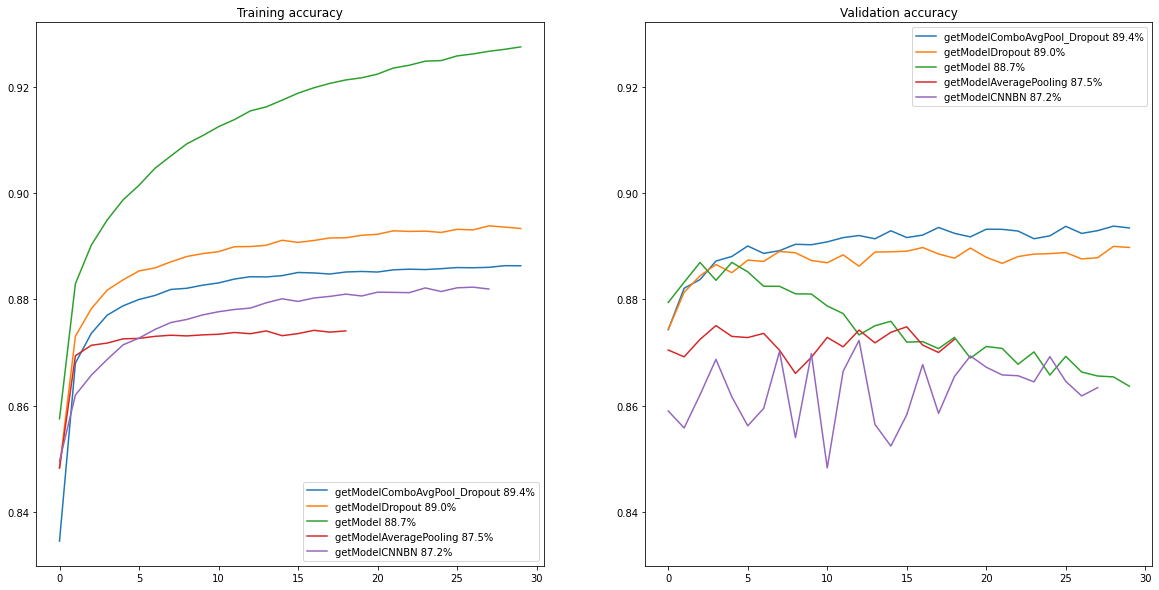

In [ ]:
model_names = ["getModel", "getModelAveragePooling", "getModelDropout", "getModelCNNBN", "getModelComboAvgPool_Dropout"]
histories = [history_getModel, history_getModelAveragePooling, history_getModelDropout, history_getModelCNNBN, history_getModelComboAvgPool_Dropout]
vizualize_results(model_names, histories)

In [ ]:
def vizualize_results_loss(models, histories):
    plt.figure(figsize=(20,10))
    ax1=plt.subplot(121)
    
    srtd = sorted(zip(models, histories), key=lambda x: max(x[1].history['val_accuracy']))[::-1]
    for name, history in srtd:
        plt.plot(history.history['loss'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Training loss')
        plt.legend()
    plt.subplot(122, sharey=ax1)
    for name, history in srtd:
        plt.plot(history.history['val_loss'], label=name+' %.1f%%'%(100*max(history.history['val_accuracy'])))
        plt.title('Validation loss')
        plt.legend();

Let's look at the validation loss and also dependencies between val_accuracy and number of parametrs.

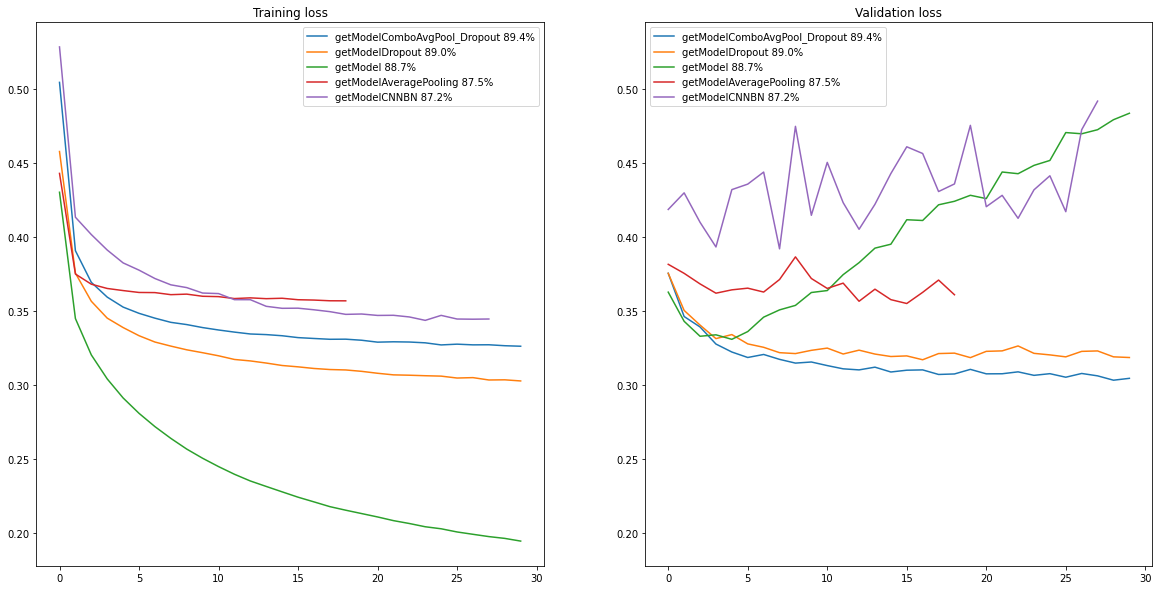

In [ ]:
model_names = ["getModel", "getModelAveragePooling", "getModelDropout", "getModelCNNBN", "getModelComboAvgPool_Dropout"]
histories = [history_getModel, history_getModelAveragePooling, history_getModelDropout, history_getModelCNNBN, history_getModelComboAvgPool_Dropout]
vizualize_results_loss(model_names, histories)

In [ ]:
params

{'getModel': 160778,
 'getModelAveragePooling': 8778,
 'getModelCNNBN': 160970,
 'getModelComboAvgPool_Dropout': 37898,
 'getModelDropout': 160778}

In [ ]:
histories = [history_getModel, history_getModelAveragePooling, history_getModelDropout, history_getModelCNNBN, history_getModelComboAvgPool_Dropout]
model_names = ["getModel", "getModelAveragePooling", "getModelDropout", "getModelCNNBN", "getModelComboAvgPool_Dropout"]

names = []
acc_max =[] 
params_list = []     
srtd = sorted(zip(model_names, histories), key=lambda x: max(x[1].history['val_accuracy']))[::-1]
for name, history in srtd:
  names.append(name)
  acc_max.append(max(history.history['val_accuracy']))
  params_list.append(params[name])

In [ ]:
df = pd.DataFrame({"model_name": names, "acc_max": acc_max, "params": params_list })
df

,model_name,acc_max,params
0,getModelComboAvgPool_Dropout,0.893764,37898
1,getModelDropout,0.889964,160778
2,getModel,0.886957,160778
3,getModelAveragePooling,0.875079,8778
4,getModelCNNBN,0.872293,160970


<Figure size 1440x1440 with 0 Axes>

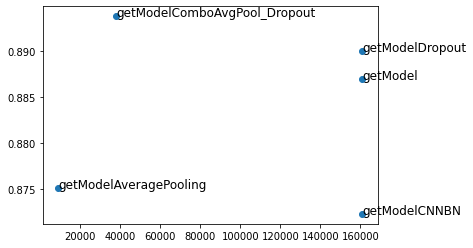

In [ ]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
plt.scatter(df['params'], df['acc_max'])

srtd = sorted(zip(range(14), df['model_name']))
for i, txt in srtd:
    ax.annotate(txt, (df['params'][i], df['acc_max'][i]), fontsize = 12)


# Summary
Looking at validation_accuracy ModelComboAvgPool_Dropout get better results than baseModel. Our main goal to improve validation_accuracy was achieved.